# Exercise 5 - IART - Supervised Learning

### Adapted from Notebook by [Randal S. Olson](http://www.randalolson.com/), supported by [Jason H. Moore](http://www.epistasis.org/)
#### [University of Pennsylvania Institute for Bioinformatics](http://upibi.org/)

## 5.1 Software/Library Installation 
Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including neural networks, support vector machines, random forests, gradient boosting, k-means and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

Start by installing Python, Anaconda, Jupyter Labs, NumPy, SciPy, Pandas, Scikit-Learn, MatPlotLib and Seaborn. In fact, it is only needed to install Anaconda that contain all the others following the link: https://www.anaconda.com/products/individual 
Information about the rest of the packages/libraries may be found at: 

•	Python Website, https://www.python.org/   
•	Anaconda Website, https://www.anaconda.com/   
•	Project Jupyter Website, https://jupyter.org/   
•	NumPy Website, https://numpy.org/   
•	SciPy Website, https://www.scipy.org/  
•	Pandas Website, https://pandas.pydata.org/  
•	Scikit-Learn Website, https://scikit-learn.org/  
•	MatPlotLib Website, https://matplotlib.org/  
•	Seaborn Website, https://seaborn.pydata.org/  

After installing all the libraries, please continue with this example Notebook that contains an example code containing several exercises.

## 5.2 Iris flower data set – Data Preprocessing and Simple Classification

From Wikipedia - The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper “The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis”. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris Virginica and Iris Versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. In this exercise we will use simple machine learning algorithms to analyze the dataset and create a model to classify the flowers in their specific type.

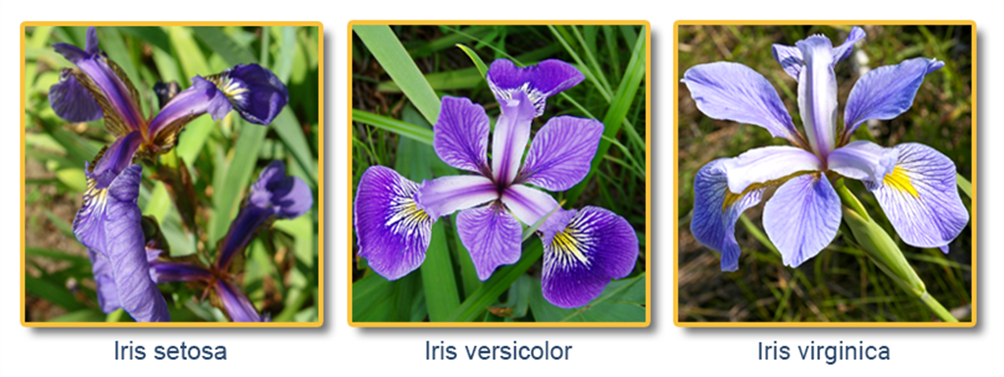

Let's start by reading the data into a pandas DataFrame.

a)	Unzip the file with the example notebook available at moodle ("iris-data.csv").

b)	Import the Pandas library, read the data from the CSV file and check the data using the head(), describe(), and other Pandas commands.

In [2]:
import pandas as pd
iris_data = pd.read_csv("iris-data-new2.csv")
print(iris_data.head())
iris_data.describe()

   sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

     iris_type  package   price  
0  Iris-setosa        2  Medium  
1  Iris-setosa        1     Low  
2  Iris-setosa        0     Low  
3  Iris-setosa        0     Low  
4  Iris-setosa        0     Low  


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,package
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.847651,3.059732,3.775168,1.209732,0.442953
std,0.799542,0.430104,1.758720,0.762191,0.710753
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


A scatterplot plots the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. It makes an efficient tool to look for errors in our data. We can even have the plotting package color each entry by its class to look for trends within the classes.

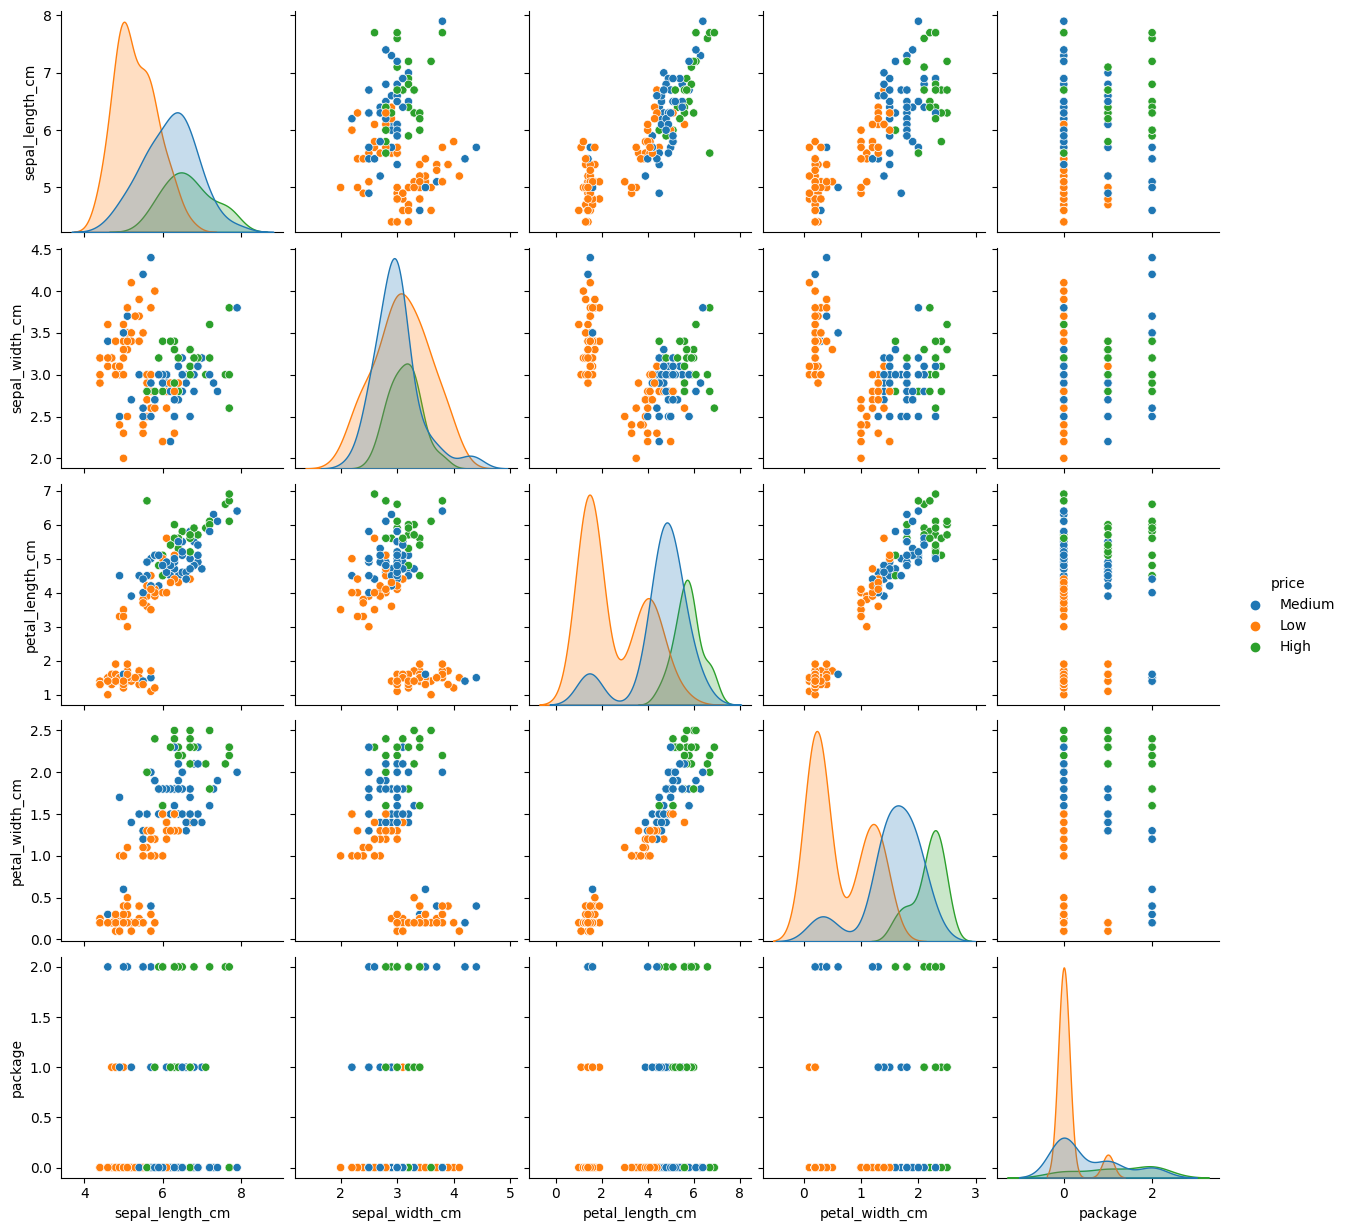

In [7]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

# We have to temporarily drop the rows with 'NA' values # because the Seaborn plotting 
# function does not know what to do with them
sb.pairplot(iris_data.dropna(), hue='price')

ValueError: num must be 1 <= num <= 4, not 5

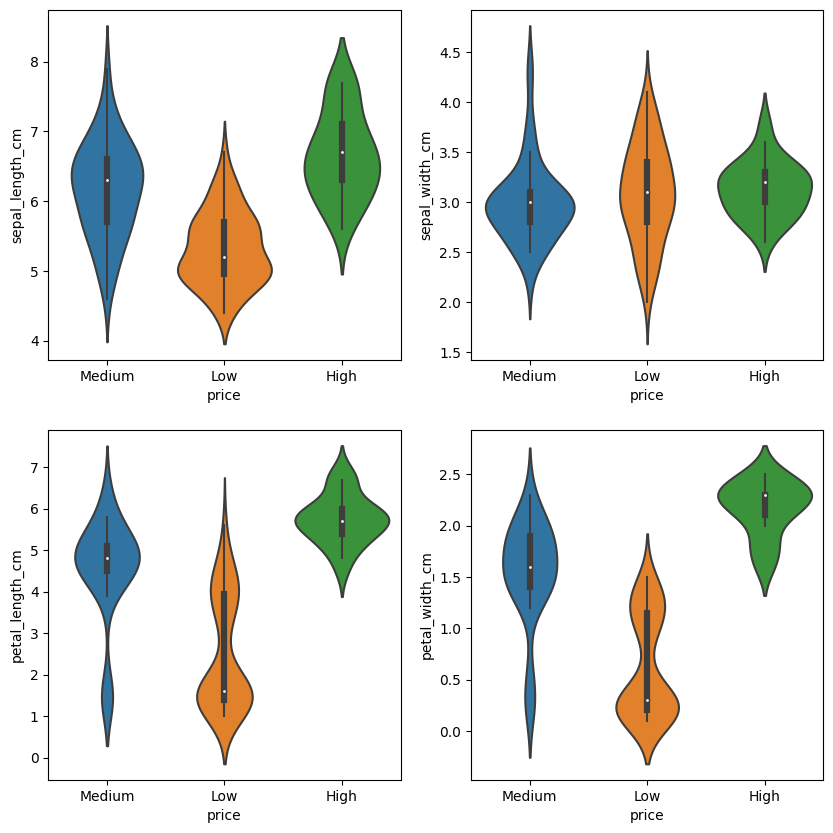

In [6]:
plt.figure(figsize=(10, 10))
 
for column_index, column in enumerate(iris_data.columns):
    if column == 'price':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='price', y=column, data=iris_data)

In [9]:
# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
all_inputs = iris_data[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values

# Similarly, we can extract the class labels
all_labels = iris_data['price'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a DecisionTreeClassifier with a maximum depth of 3
clf = DecisionTreeClassifier(max_depth=3)

def apply_model_and_get_stats(model,x_train,y_train,x_test,y_test):
    # Train the classifier on the training data
    model.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='macro')

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print the results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    return y_pred
    
y_pred_decision_tree = apply_model_and_get_stats(clf,training_inputs,training_classes,testing_inputs,testing_classes)

Accuracy: 0.7894736842105263
Precision: 0.7251082251082251
Recall: 0.7333333333333334
F1-score: 0.7202797202797203


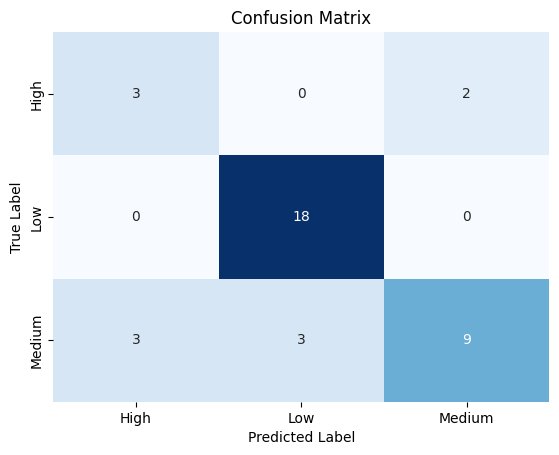

In [65]:
from sklearn.metrics import confusion_matrix
import numpy as np

def display_confusion_matrix(y_pred,y_test):
    cm = confusion_matrix(y_test,y_pred)

    # Define the class labels
    classes = np.unique(y_test)

    # Create a confusion matrix plot using seaborn
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)

    # Set the axis labels and title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    # Show the plot
    plt.show()
    
display_confusion_matrix(y_pred_decision_tree,testing_classes)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=40)

y_pred_knn = apply_model_and_get_stats(knn,training_inputs,training_classes,testing_inputs,testing_classes)

Accuracy: 0.6842105263157895
Precision: 0.7946428571428571
Recall: 0.5740740740740741
F1-score: 0.5882352941176471


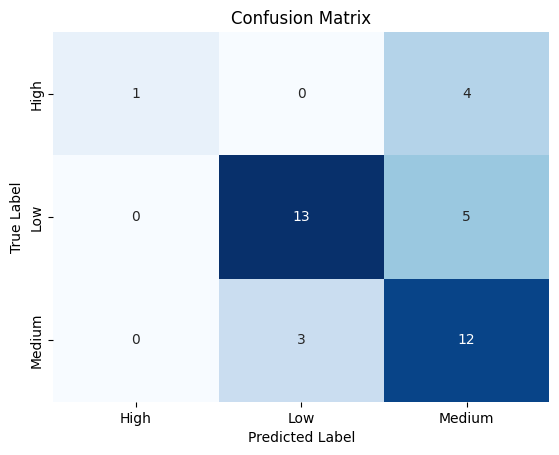

In [68]:
display_confusion_matrix(y_pred_knn,testing_classes)

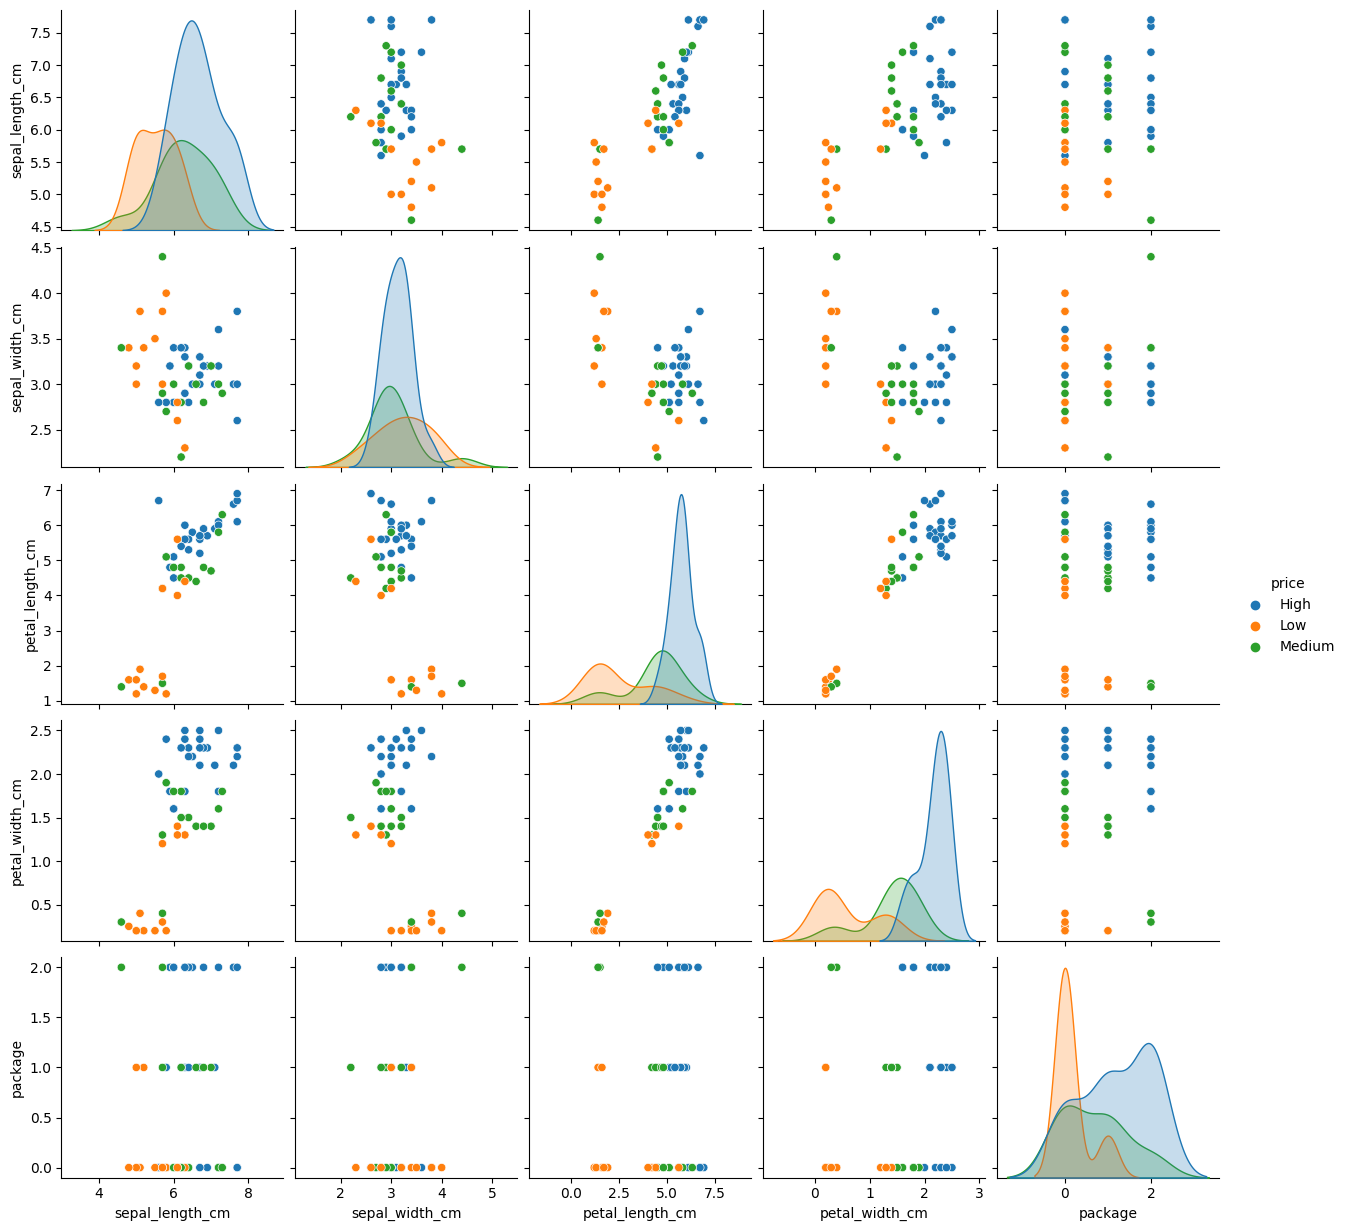

In [70]:
from sklearn.utils import resample

# count the number of entries for each category
value_counts = iris_data['price'].value_counts()

# determine the number of entries in the minority class (i.e., "high")
minority_count = value_counts[-1]

# randomly undersample the majority classes ("medium" and "low")
majority_samples = iris_data[iris_data['price'].isin(['Medium', 'Low'])]
undersampled_majority = resample(majority_samples, replace=False, n_samples=minority_count)

# combine the minority class with the undersampled majority classes
iris_data_undersampled = pd.concat([iris_data[iris_data['price'] == 'High'], undersampled_majority])


sb.pairplot(iris_data_undersampled.dropna(), hue='price')

The classification accuracy falls tremendously! Therefore, we need to find a systematic method to discover the best parameters for our model and data set. 

The most common method for model parameter tuning is Grid Search. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our decision tree classifier. We'll stick to only two parameters for now, but it's possible to simultaneously explore dozens of parameters if we want.

p)	Import GridSearchCV and perform a Grid Search over the Decision Tree parameters to find the best parameters, visualizing the grid with the accuracies for each parameter’s pairs (max_features 1-4 and max_depth 1-5). 

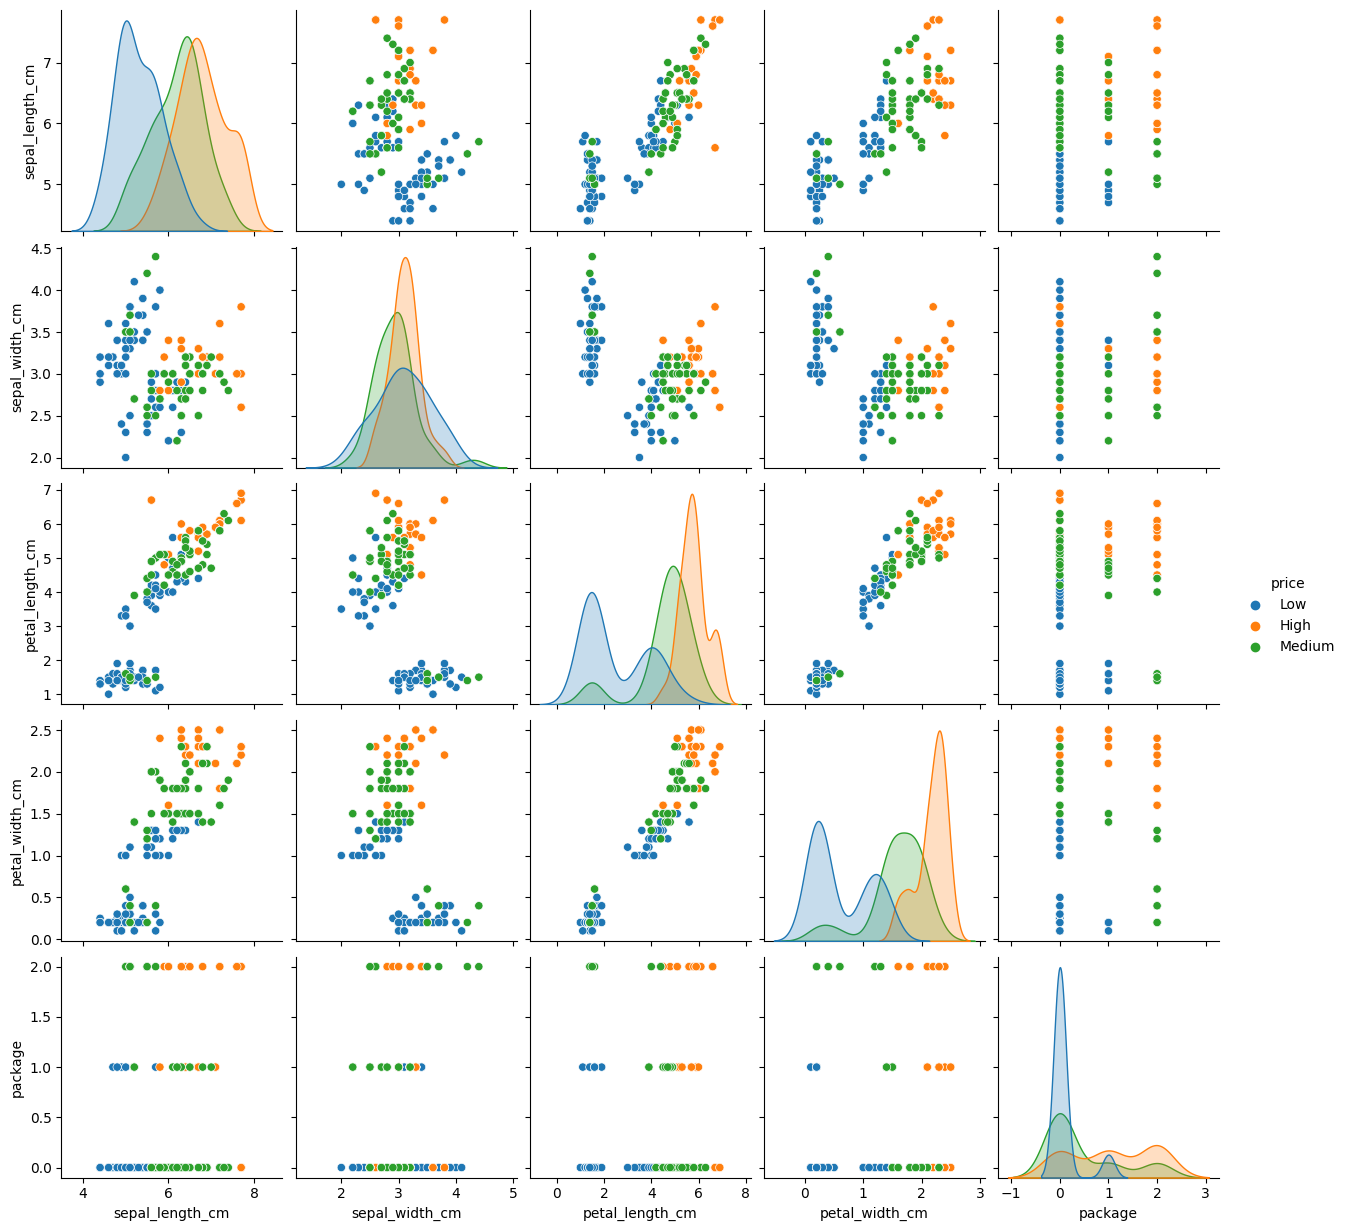

In [71]:
import pandas as pd
from sklearn.utils import resample

# count the number of entries for each category
value_counts = iris_data['price'].value_counts()

# determine the number of entries in the minority classes (i.e., "high" and "medium")
minority_counts = value_counts[-2:]

# oversample the minority classes ("high" and "medium")
oversampled_classes = []
for cls in ['High', 'Medium']:
    minority_samples = iris_data[iris_data['price'] == cls]
    oversampled_minority = resample(minority_samples, replace=True, n_samples=value_counts.max())
    oversampled_classes.append(oversampled_minority)

# combine the oversampled minority classes with the majority class ("low")
iris_data_oversampled = pd.concat([iris_data[iris_data['price'] == 'Low']] + oversampled_classes)


sb.pairplot(iris_data_oversampled.dropna(), hue='price')

In [113]:
undersampled_all_inputs = iris_data_undersampled[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values

# Similarly, we can extract the class labels
undersampled_all_labels = iris_data_undersampled['price'].values

(undersampled_training_inputs,
 undersampled_testing_inputs,
 undersampled_training_classes,
 undersampled_testing_classes) = train_test_split(undersampled_all_inputs, undersampled_all_labels, test_size=0.25, random_state=1)


In [114]:
oversampled_all_inputs = iris_data_oversampled[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values

# Similarly, we can extract the class labels
oversampled_all_labels = iris_data_oversampled['price'].values

(oversampled_training_inputs,
 oversampled_testing_inputs,
 oversampled_training_classes,
 oversampled_testing_classes) = train_test_split(oversampled_all_inputs, oversampled_all_labels, test_size=0.25, random_state=1)

Now let's visualize the grid search to see how the parameters interact.

q)	Visualize in a graphical manner the final decision tree achieved. 

Accuracy: 0.6923076923076923
Precision: 0.6833333333333332
Recall: 0.688888888888889
F1-score: 0.6793650793650793


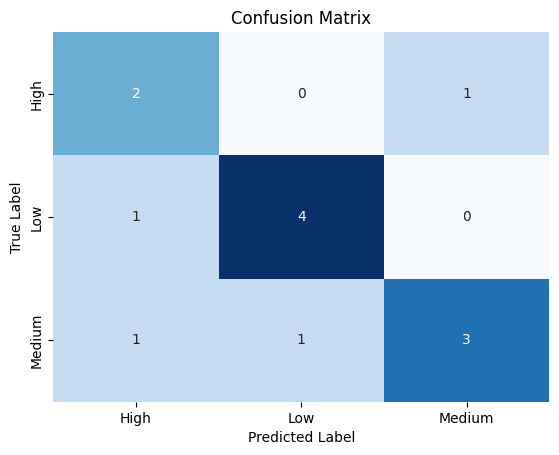

In [134]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=3)
y_pred_dt_undersampled = apply_model_and_get_stats(decision_tree_classifier,undersampled_training_inputs,
                        undersampled_training_classes,undersampled_testing_inputs,undersampled_testing_classes)


display_confusion_matrix(y_pred_dt_undersampled, undersampled_testing_classes)


Accuracy: 0.7777777777777778
Precision: 0.7928853754940711
Recall: 0.7620772946859903
F1-score: 0.7684875510962467


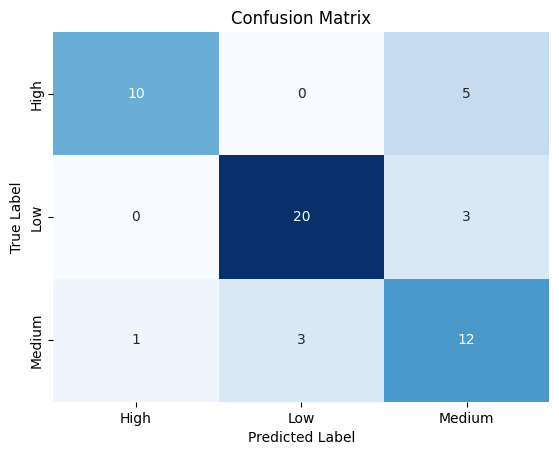

In [137]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=3)
y_pred_dt_oversampled = apply_model_and_get_stats(decision_tree_classifier,oversampled_training_inputs,
                        oversampled_training_classes,oversampled_testing_inputs,oversampled_testing_classes)


display_confusion_matrix(y_pred_dt_oversampled,oversampled_testing_classes)


Accuracy: 0.6153846153846154
Precision: 0.6166666666666667
Recall: 0.6222222222222222
F1-score: 0.6126984126984127


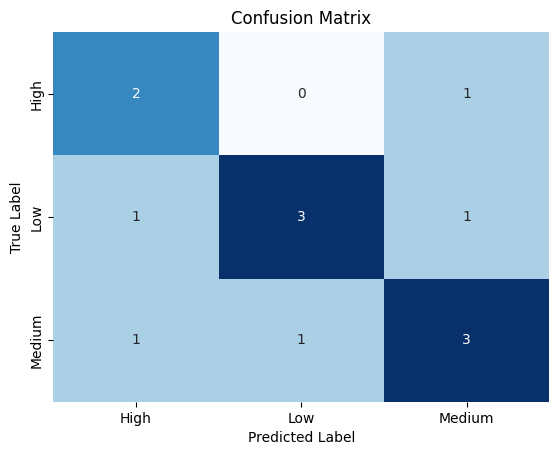

In [140]:
knn = KNeighborsClassifier()
y_pred_knn_undersampled = apply_model_and_get_stats(knn,undersampled_training_inputs,
                        undersampled_training_classes,undersampled_testing_inputs,undersampled_testing_classes)


display_confusion_matrix(y_pred_knn_undersampled,undersampled_testing_classes)


Now we can take the best classifier from the Grid Search and use that:

Accuracy: 0.7407407407407407
Precision: 0.7405228758169935
Recall: 0.7204106280193235
F1-score: 0.7267115600448933


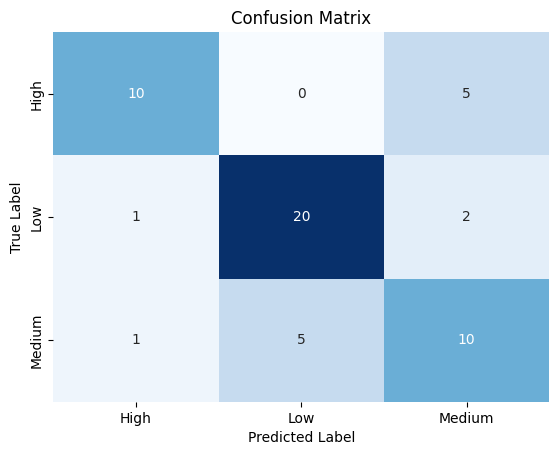

In [141]:
knn = KNeighborsClassifier()
y_pred_knn_oversampled = apply_model_and_get_stats(knn,oversampled_training_inputs,
                        oversampled_training_classes,oversampled_testing_inputs,oversampled_testing_classes)


display_confusion_matrix(y_pred_knn_oversampled,oversampled_testing_classes)

We can even visualize the decision tree with [GraphViz](http://www.graphviz.org/) to see how it's making the classifications:

In [142]:
best_inputs = iris_data_oversampled[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm','package']].values

# Similarly, we can extract the class labels
best_labels = iris_data_oversampled['price'].values

(best_training_inputs,
 best_testing_inputs,
 best_training_classes,
 best_testing_classes) = train_test_split(best_inputs, best_labels, test_size=0.25, random_state=1)

Accuracy: 0.9259259259259259
Precision: 0.9305555555555555
Recall: 0.9216183574879228
F1-score: 0.9255624847150893


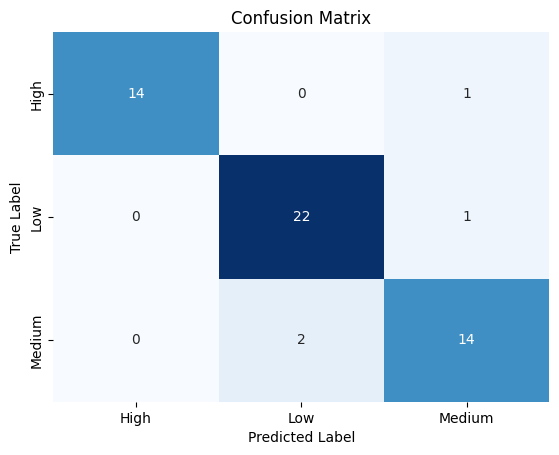

In [145]:
dtt = DecisionTreeClassifier()
y_pred_dttn_best = apply_model_and_get_stats(dtt,best_training_inputs,
                        best_training_classes,best_testing_inputs,best_testing_classes)


display_confusion_matrix(y_pred_dttn_best,best_testing_classes)

Accuracy: 0.8703703703703703
Precision: 0.8745512820512821
Recall: 0.8668478260869565
F1-score: 0.8671208750463478


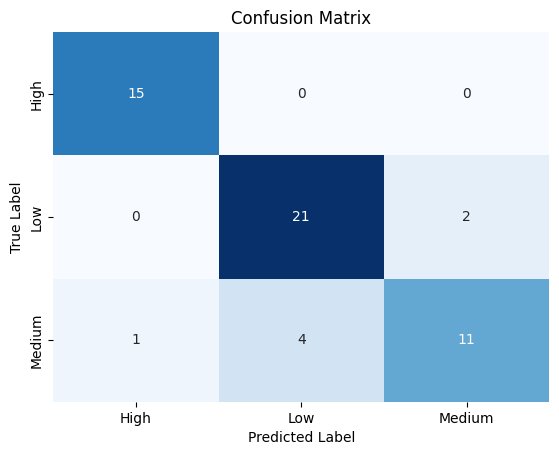

In [148]:
knn = KNeighborsClassifier()
y_pred_knn_best = apply_model_and_get_stats(knn,best_training_inputs,
                        best_training_classes,best_testing_inputs,best_testing_classes)


display_confusion_matrix(y_pred_knn_best,best_testing_classes)

Accuracy: 0.9814814814814815
Precision: 0.9803921568627452
Recall: 0.9855072463768115
F1-score: 0.9824915824915825


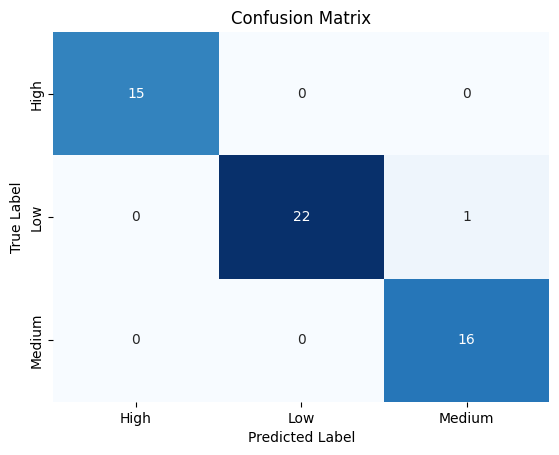

In [170]:
from sklearn import svm

#Create a svm Classifier
svc = svm.SVC(kernel='linear') # Linear Kernel

y_pred_svm_best = apply_model_and_get_stats(svc,best_training_inputs,
                        best_training_classes,best_testing_inputs,best_testing_classes)


display_confusion_matrix(y_pred_svm_best,best_testing_classes)

In [172]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

"""
# Convert the target variable into a one-hot encoded matrix
y_train = to_categorical(best_training_classes)
y_test = to_categorical(best_testing_classes)

# Create a neural network model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(best_training_inputs, y_train, epochs=50, batch_size=10, verbose=0)

y_pred_neural_network = model.predict(best_testing_inputs)

accuracy = accuracy_score(y_test, y_pred_neural_network)

# Calculate precision
precision = precision_score(y_test, y_pred_neural_network, average='macro')

# Calculate recall
recall = recall_score(y_test, y_pred_neural_network, average='macro')

# Calculate F1-score
f1 = f1_score(y_test, y_pred_neural_network, average='macro')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

display_confusion_matrix(y_pred_neural_network,best_testing_classes)
"""

2023-04-23 14:56:24.250775: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ValueError: invalid literal for int() with base 10: 'Medium'